In [1]:
import shutil
import random
import os
import time
from PIL import Image

import matplotlib.pyplot as plt
from cv2 import imread
import cv2

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
def reset_directory(dir_path):
    """
    Deletes the contents of a directory and then recreates the directory.
    
    Arguments:
    dir_path (str): The path of the directory to reset.
    
    Returns:
    None
    """

    # If the directory is already empty, print a message and return

    if len(os.listdir(dir_path)) == 0 :
        print(dir_path + " is already empty")
        return

    # Print a message and record the starting time
    beg = time.time()
    print("resetting "+ dir_path)

    # Delete the directory and all its contents
    shutil.rmtree(dir_path)

    # Create an empty directory in the same location
    os.makedirs(dir_path)
    print(dir_path + " is now empty")
    print("timing : " + str(time.time() - beg))

In [3]:
def extract_corrupt_img_files(dir_path):
  """
  Gets corrupted image files within a directory
  
    Arguments:
        dir_path: a string representing the path for the target directory

    Returns:
        a list of the paths for the corrupted image files

  """ 
  i = 0
  beg = time.time()
  corrupted = []
  for filename in os.listdir(dir_path):
    i +=1
    if (i % 50 == 0):
      print(i, end =" ")
    if (i % 1000 == 0):
      print()
    try:
      img = Image.open(dir_path + '/' + filename)
    except:
      corrupted.append(filename)
      continue

  end = time.time()
  print()
  print('*' * 50) 
  print("\nTASK FINISHED IN " + str(end - beg) + " seconds ")
  print("{} corrupted files found in {}".format(len(corrupted), dir_path))
  print()
  print('*' * 50) 
  return corrupted

In [4]:
def copy_clean(src = '', dest ='', ignore = []):
    """
    Copies all the files from the source directory to the destination directory, ignoring the files specified in the ignore list.
    
    Parameters:
    src (str): The path of the source directory.
    dest (str): The path of the destination directory.
    ignore (list): A list of file names to ignore.
    
    Returns:
    None
    """
    beg = time.time()
    print("Copying file from " + src + " to " + dest)
    i = 0
    j = 0
    for filename in (os.listdir(src)):
        i += 1
        if filename not in ignore:
            shutil.copy(src + '/' + filename, dest + '/' + filename)
            j+=1
        if (i % 100 == 0):
            print(i, end = " ")
        if (i % 1000 == 0):
            print()
        
    end = time.time()
    print()
    print(j)
    print("Copying {} files finished in {} seconds ".format(len(os.listdir(dest)),int(end - beg)))

In [5]:
def train_test_validation_split(data_path = '',test_split = 0.15, validation_split = 0.15):

    """
    Splits a dataset into three subsets: a training set, a validation set, and a test set.
    
    Parameters:
    data_path (str): The path of the directory containing the dataset.
    test_split (float): The fraction of the dataset to include in the test set.
    validation_split (float): The fraction of the remaining dataset to include in the validation set.
    
    Returns:
    tuple: A tuple containing three lists of file names: the training set, the test set, and the validation set.
    """

    # Calculate the total number of files in the dataset
    data_size = len(os.listdir(data_path))

    # Calculate the number of files to include in the test and validation sets
    test_size = int(test_split * data_size)
    validation_size = int(validation_split * data_size)
    

    
    test_sample = []
    validation_sample = []
    train_sample = []
    
    # Select a random sample of files for the test set
    test_sample = random.sample(os.listdir(data_path),test_size )
    
    # Calculate the remaining files that are not in the test set
    train_data = set(os.listdir(data_path)) - set(test_sample)
    train_data = list(train_data)
    
    # Select a random sample of files from the remaining files for the validation set
    validation_sample = random.sample(train_data,validation_size )
    
    # Calculate the remaining files that are not in the validation set
    train_sample = set(train_data) - set(validation_sample)
    train_sample = list(train_sample)
    
    # Print the sizes of the train, test, and validation sets
    print('train size ' + str(len(train_sample)))
    print('test size ' + str(len(test_sample)))
    print('validation size ' + str(len(validation_sample)))
    
    return train_sample, test_sample , validation_sample

In [6]:
def split_data_to_dir(class_str = '',src_path ='', dest_path ='',samples ={}):
  """
  Copies samples (represented by a dict) from one source directory to a destination directory 
  
    Arguments:
        class_str: a string representing the class
        src_path: a string representing the path for the source directory
        dest_path: a string representing the path for the destination directory
        sample: a python Dict representing either test or train or validation samples 

    Returns:
        None

  """

  src_path = src_path + '/' + class_str
  dest_path = dest_path + '/' + class_str
  beg = time.time()
  print(" Sending test samples to  " + dest_path)
  i = 0 # to track haw many imgs are copied
  for filename in samples[class_str]:
    shutil.copy(src_path + '/' + filename, dest_path + '/'+ class_str + "_" + filename)
    i+=1
    if (i % 25 == 0 ):
      print(i, end = " ")
    if (i % 500 == 0):
      print()

  endt = time.time()
  print("nb of test samples for {} is {}".format(class_str, str(i)))
  print("Sending {} test samples complete in {} seconds ".format(str(i),str(endt - beg)))

In [7]:
import matplotlib.pyplot as plt
from cv2 import imread

def display_imgs_from_path(path='', rows = 1, cols = 1):
  """
  Displays random rows * cols images from a directory
    
  Arguments:
      path: a string representing the path for the directory with the images to displat 
      rows: an integer representing the number of rows in the plots figure
      cols: an integer representing the number of columns in the plots figure

  Returns:
      None

  """
  fig = plt.figure(figsize=(8, 5))

  for i , img_name in enumerate(random.sample(os.listdir(path), rows * cols)):
    img = imread(path + '/' + img_name)
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name[:8])

In [8]:
print("Cat samples : {}".format(len(os.listdir("/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Cat"))))
print("Dog samples : {}".format(len(os.listdir("/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Dog"))))

Cat samples : 12501
Dog samples : 12501


In [9]:
dog_path = "/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Dog"
cat_path = "/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Cat"

corrupted_dog_imgs = extract_corrupt_img_files(dog_path)
corrupted_cat_imgs = extract_corrupt_img_files(cat_path)

50 100 150 200 250 300 350 400 450 500 550 

/home/robert/trade/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


600 650 700 750 800 850 900 950 1000 
1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 
2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 
3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 
4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 
5600 5650 5700 5750 5800 5850 5900 5950 6000 5500 5550 
6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 
7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 
8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 
9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 
10200 10250 10300 10350 10400 10450 10500 10550 10600 10650 10700 10750 10800 10850 10900 10950 11000 
11350 11400 11450 11500 11550 11600 11650 11700 11750 11800 11850 11900 11950 12000 
12500 12100 12150 12200 12250 12300 12350 12400 12450 
*******************

In [10]:
print(corrupted_dog_imgs)
print(corrupted_cat_imgs)

['Thumbs.db', '11702.jpg']
['Thumbs.db', '666.jpg']


In [11]:
"""
os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Data/train')
os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Data/test')
"""
try:
    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset')

    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Cat')
    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Cat')

    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Dog')
    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Dog')

    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Dog')
    os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Cat')
except FileExistsError :
    print("files already exists")
    pass

files already exists


In [12]:
# os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Cat')
# os.makedirs('/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Dog')

In [13]:
original_dataset_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages'
clean_dataset_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset'
test_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test'
train_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train'
validation_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation'

In [14]:
reset_directory(clean_dataset_path +'/Cat')

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Cat
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Cat is now empty
timing : 0.2152576446533203


In [15]:
reset_directory(clean_dataset_path +'/Cat')

copy_clean(src = original_dataset_path + '/Cat',
           dest = clean_dataset_path +'/Cat',
           ignore = corrupted_cat_imgs)
print(len(os.listdir(clean_dataset_path +'/Cat')))

/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Cat is already empty
Copying file from /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Cat to /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Cat
600 700 800 900 1000 
1200 1300 1400 1500 1600 1700 1800 1900 2000 
2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4400 4500 4600 4700 4800 4900 5000 
5600 5700 5800 5900 6000 
6200 6300 6400 6500 6600 6700 6800 6900 7000 
7400 7500 7600 7700 7800 7900 8000 
8600 8700 8800 8900 9000 
9300 9400 9500 9600 9700 9800 9900 10000 
10700 10800 10900 11000 10500 10600 
11300 11400 11500 11600 11700 11800 11900 12000 
12500 12200 12300 12400 
12499
Copying 12499 files finished in 4 seconds 
12499


In [16]:
reset_directory(clean_dataset_path +'/Dog')

copy_clean(src = original_dataset_path + '/Dog',
           dest = clean_dataset_path +'/Dog',
           ignore = corrupted_dog_imgs)
print(len(os.listdir(clean_dataset_path +'/Dog')))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Dog
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Dog is now empty
timing : 0.21473217010498047
Copying file from /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/PetImages/Dog to /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset/Dog
500 600 700 800 900 1000 
1600 1700 1800 1900 2000 
2200 2300 2400 2500 2600 2700 2800 2900 3000 
3400 3500 3600 3700 3800 3900 4000 
4600 4700 4800 4900 5000 
5300 5400 5500 5600 5700 5800 5900 6000 
6400 6500 6600 6700 6800 6900 7000 
7600 7700 7800 7900 8000 
8200 8300 8400 8500 8600 8700 8800 8900 9000 
9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11300 11400 11500 11600 11700 11800 11900 12000 
12500 12200 12300 12400 
12499
Copying 12499 files finished in 4 seconds 
12499


In [17]:
cat_train_sample, cat_test_sample , cat_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Cat')

train size 8751
test size 1874
validation size 1874


In [18]:
dog_train_sample, dog_test_sample , dog_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Dog')

train size 8751
test size 1874
validation size 1874


In [19]:
test_samples = { 'Cat': cat_test_sample,
                 'Dog': dog_test_sample,
                }

validation_samples = { 'Cat': cat_validation_sample,
                       'Dog': dog_validation_sample,
                      }
train_samples = { 'Cat': cat_train_sample,
                  'Dog': dog_train_sample,
                      }

In [20]:
clean_dataset_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Dataset'
test_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test'
train_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train'
validation_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation'

In [21]:
reset_directory(test_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Cat")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Cat
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Cat is now empty
timing : 0.028855085372924805
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
850 875 900 925 950 975 1000 00 725 750 775 800 825 
1300 1325 1350 1375 1400 1425 1450 1475 1500 1250 1275 
1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 0.17877483367919922 seconds 
1874


In [22]:
reset_directory(train_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Cat")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Cat
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Cat is now empty
timing : 0.1927793025970459
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Cat
75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3525 3550 3575 360

In [23]:
reset_directory(validation_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Cat")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Cat
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Cat is now empty
timing : 0.03866267204284668
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Cat
75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 0.18754100799560547 seconds 
1874


In [24]:
reset_directory(test_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Dog")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Dog
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Dog is now empty
timing : 0.03560638427734375
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/test/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1500 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 
1700 1725 1750 1775 1800 1825 1850 nb of test samples for Dog is 1874
Sending 1874 test samples complete in 0.18991851806640625 seconds 
1874


In [25]:
reset_directory(train_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Dog")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Dog
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Dog is now empty
timing : 0.18213629722595215
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/train/Dog
150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3575 3600 3625 3650 3675 3700 3725 3750 3775 380

In [26]:
reset_directory(validation_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Dog")))

resetting /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Dog
/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Dog is now empty
timing : 0.04027223587036133
 Sending test samples to  /home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/validation/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
900 925 950 975 1000 50 675 700 725 750 775 800 825 850 875 
1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1825 1850 nb of test samples for Dog is 1874 1750 1775 1800 
Sending 1874 test samples complete in 0.16909480094909668 seconds 
1874


In [27]:
print("Folders in test " + str(len(os.listdir(test_path))))
print("Samples in test/Cat: " + str(len(os.listdir(test_path + "/Cat"))))
print("Samples in test/Dog: " + str(len(os.listdir(test_path + "/Dog"))))

print("Folders in validation " + str(len(os.listdir(validation_path))))
print("Samples in validation/Cat: " + str(len(os.listdir(validation_path + "/Cat"))))
print("Samples in validation/Dog: " + str(len(os.listdir(validation_path + "/Dog"))))

print("Folders in train " + str(len(os.listdir(train_path))))
print("Samples in train/Cat: " + str(len(os.listdir(train_path + "/Cat"))))
print("Samples in train/Dog: " + str(len(os.listdir(train_path + "/Dog"))))

Folders in test 2
Samples in test/Cat: 1874
Samples in test/Dog: 1874
Folders in validation 2
Samples in validation/Cat: 1874
Samples in validation/Dog: 1874
Folders in train 2
Samples in train/Cat: 8751
Samples in train/Dog: 8751


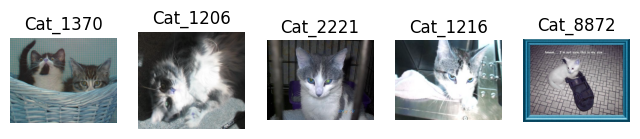

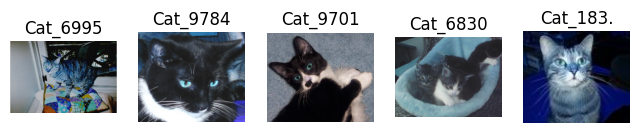

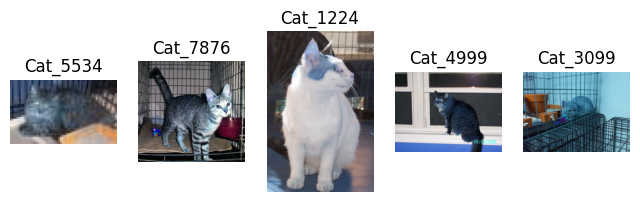

In [28]:
display_imgs_from_path(path=test_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Cat', rows = 1, cols = 5)

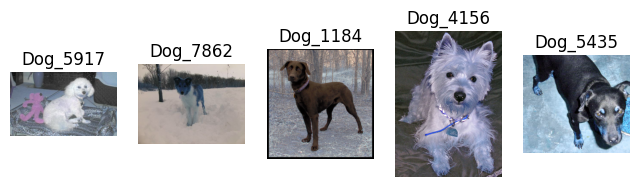

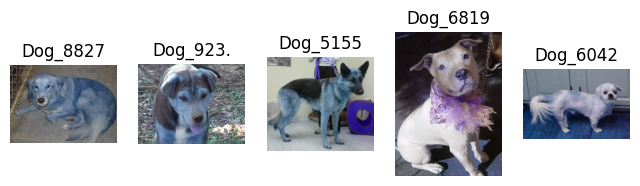

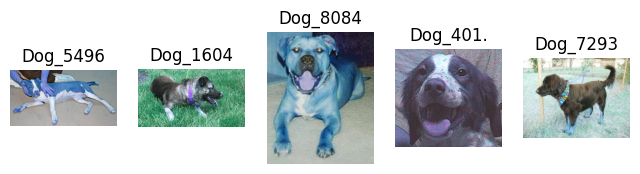

In [29]:
display_imgs_from_path(path=test_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Dog', rows = 1, cols = 5)

In [30]:
# Import the ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and Batch size
WIDTH = 128
HEIGHT = 128
IMG_SIZE = (WIDTH , HEIGHT)
BATCH = 32

# Create an ImageDataGenerator object for the validation set
validation_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the test set
test_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the training set

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

2025-11-04 16:37:53.598002: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-04 16:37:54.055253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762292274.212799    8318 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762292274.259294    8318 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 16:37:54.665253: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [31]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    #save_to_dir=aug_data_path,
                                                    #save_prefix='aug_',
                                                    #save_format="jpg",
                                                    seed = 1
                                                    )
print(train_generator.class_indices)
print(train_generator.num_classes)
print(train_generator.samples)

Found 17502 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}
2
17502


In [32]:
validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1
                                                             )
print(validation_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


In [33]:
test_generator = test_datagen.flow_from_directory(test_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1 )
print(test_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


In [34]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau , CSVLogger

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/home/robert/trade/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-04 16:37:58.470246: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,001 (19.50 MB)

 Trainable params: 5,110,017 (19.49 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [35]:
'''
models_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Models'
os.makedirs(models_path)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience= 4, 
                                            verbose= 1, 
                                            factor= 0.75, 
                                            min_lr= 0.00001)

early_stopping = EarlyStopping(patience = 10)

"""checkpoint_loss = ModelCheckpoint(filepath = models_path + '/model_best_loss.hdf5',
    monitor = "val_loss",
    save_best_only = True, save_freq= 'epoch' )"""

checkpoint_acc = ModelCheckpoint(filepath = models_path + '/model_best_acc.hdf5',
    monitor = "val_accuracy",
    save_best_only = True, save_freq= 'epoch' )

filename='log.csv'
history_logger= CSVLogger(filename, separator=",", append=True)


callbacks = [learning_rate_reduction, early_stopping , #checkpoint_loss , 
             checkpoint_acc, history_logger]

'''

'\nmodels_path = \'/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Models\'\nos.makedirs(models_path)\n\nlearning_rate_reduction = ReduceLROnPlateau(monitor=\'val_accuracy\', \n                                            patience= 4, \n                                            verbose= 1, \n                                            factor= 0.75, \n                                            min_lr= 0.00001)\n\nearly_stopping = EarlyStopping(patience = 10)\n\n"""checkpoint_loss = ModelCheckpoint(filepath = models_path + \'/model_best_loss.hdf5\',\n    monitor = "val_loss",\n    save_best_only = True, save_freq= \'epoch\' )"""\n\ncheckpoint_acc = ModelCheckpoint(filepath = models_path + \'/model_best_acc.hdf5\',\n    monitor = "val_accuracy",\n    save_best_only = True, save_freq= \'epoch\' )\n\nfilename=\'log.csv\'\nhistory_logger= CSVLogger(filename, separator=",", append=True)\n\n\ncallbacks = [learning_rate_reduction, early_stopping , #checkpoint_loss , \n

In [36]:
models_path = '/home/robert/Documents/GMU2/CSS/Applied Machine Learning/kaggle/working/Models'
os.makedirs(models_path, exist_ok=True)  # avoid error if dir already exists

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=4,
    verbose=1,
    factor=0.75,
    min_lr=1e-5
)

early_stopping = EarlyStopping(patience=10)

checkpoint_acc = ModelCheckpoint(
    filepath = models_path + '/model_best_acc.keras',  # or 'model_best_acc.h5'
    monitor = "val_accuracy",
    save_best_only = True,
    save_freq = 'epoch'
)

filename = 'log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

callbacks = [
    learning_rate_reduction,
    early_stopping,
    checkpoint_acc,
    history_logger
]


In [37]:
EPOCHS = 10
beg = int(time.time())

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH,
    callbacks=callbacks,
)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs, mins, secs))
model.save_weights(models_path + "/.weights.h5")
model.save(models_path + "/first_try.h5")

/home/robert/trade/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 241s 436ms/step - accuracy: 0.6240 - loss: 0.7985 - val_accuracy: 0.7097 - val_loss: 0.5518 - learning_rate: 0.0010
Epoch 2/10
  1/546 ━━━━━━━━━━━━━━━━━━━━ 2:59 330ms/step - accuracy: 0.7812 - loss: 0.5435

/home/robert/trade/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


546/546 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.7812 - loss: 0.5435 - val_accuracy: 0.7110 - val_loss: 0.5511 - learning_rate: 0.0010
Epoch 3/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 208s 380ms/step - accuracy: 0.7261 - loss: 0.5493 - val_accuracy: 0.7628 - val_loss: 0.4938 - learning_rate: 0.0010
Epoch 4/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7188 - loss: 0.5555 - val_accuracy: 0.7601 - val_loss: 0.4997 - learning_rate: 0.0010
Epoch 5/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 195s 356ms/step - accuracy: 0.7793 - loss: 0.4689 - val_accuracy: 0.8013 - val_loss: 0.4125 - learning_rate: 0.0010
Epoch 6/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7500 - loss: 0.4472 - val_accuracy: 0.8005 - val_loss: 0.4121 - learning_rate: 0.0010
Epoch 7/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 213s 391ms/step - accuracy: 0.8101 - loss: 0.4171 - val_accuracy: 0.8229 - val_loss: 0.3994 - learning_rate: 0.0010
Epoch 8/10
546/546 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8125 - loss: 0.

training took 0 hrs -- 18 mins -- 33 secs


In [38]:
'''
model.save_weights(models_path + "/.weights.h5")
model.save(models_path + "/first_try.h5")
'''

'\nmodel.save_weights(models_path + "/.weights.h5")\nmodel.save(models_path + "/first_try.h5")\n'

In [39]:
scores = model.evaluate(test_generator)

 94/118 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.7895 - loss: 0.4887

/home/robert/trade/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.7906 - loss: 0.4897


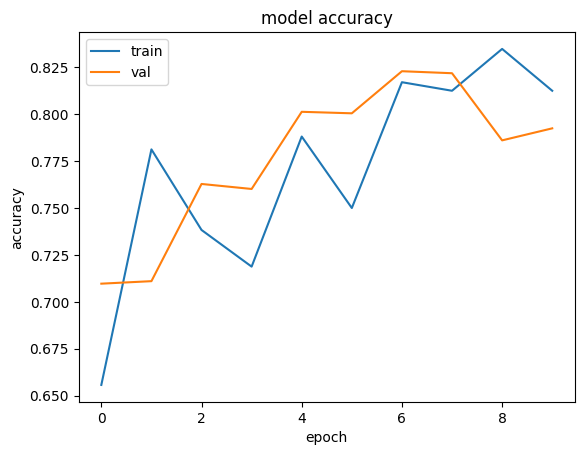

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

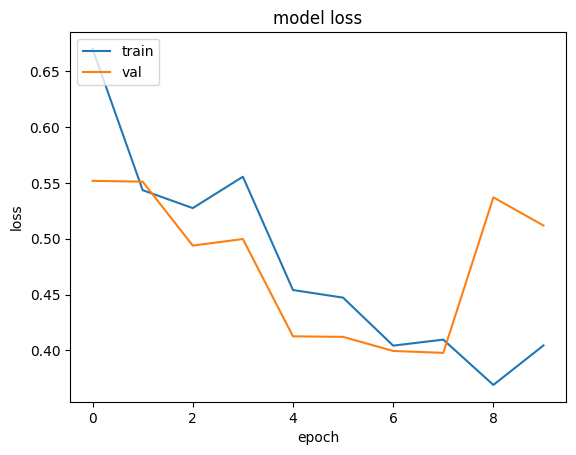

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

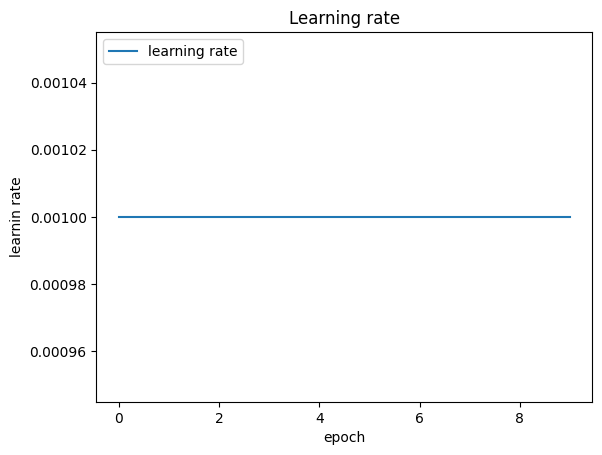

In [42]:
plt.plot(history.history['learning_rate'])
plt.title('Learning rate')
plt.ylabel('learnin rate')
plt.xlabel('epoch')
plt.legend(['learning rate'], loc='upper left')
plt.show()

In [43]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [44]:
labels = ["Cat","Dog"]

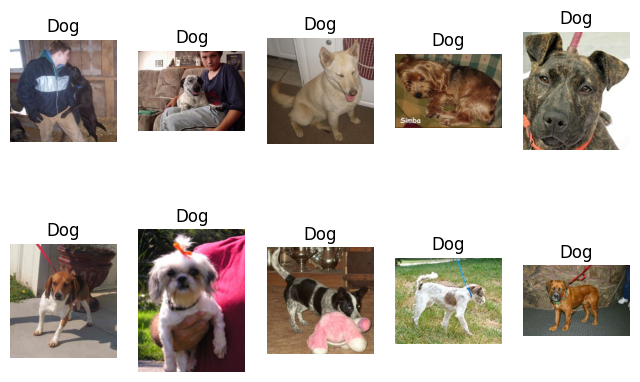

In [45]:
import numpy as np 

fig = plt.figure(figsize=(8, 5))

    
for j in range(10):
    i = random.randint(0,1800)
    dog_test_img = cv2.imread(test_path + '/Dog'+'/'+
                              os.listdir(test_path + '/Dog')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    dog_test_img = cv2.cvtColor(dog_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(2, 5, j+1)
    plt.imshow(dog_test_img)
    plt.axis('off')
    
    dog_test_img = cv2.resize(dog_test_img,(128,128))
    dog_test_img = np.reshape(dog_test_img,(1,128,128,3))
    #print(dog_test_img.shape)
    
    results = model.predict(dog_test_img,verbose = 0)
    results = np.squeeze(results)
    plt.title(labels[results.astype(int)])

    #print(results.astype(int))
    #print(type(results))

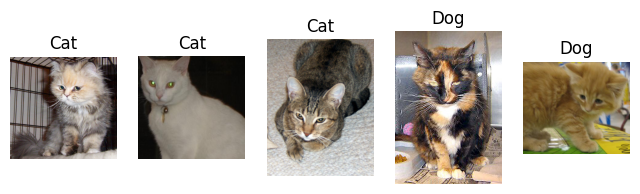

In [46]:
fig = plt.figure(figsize=(8, 5))

    
for j in range(5):
    i = random.randint(0,1000)
    cat_test_img = cv2.imread(train_path + '/Cat'+'/'+
                              os.listdir(train_path + '/Cat')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    cat_test_img = cv2.cvtColor(cat_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, j+1)
    plt.imshow(cat_test_img)
    plt.axis('off')
    
    cat_test_img = cv2.resize(cat_test_img,(128,128))
    cat_test_img = np.reshape(cat_test_img,(1,128,128,3))
    #print(dog_test_img.shape)
    
    results = model.predict(cat_test_img,verbose = 0)
    results = np.squeeze(results)
    label_idx = np.round(results,1).astype(int)
    plt.title(labels[label_idx])

    #print(results.astype(int))
    #print(type(results))

In [47]:
from sklearn.metrics import confusion_matrix
for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    print(y)
    print(y.shape)
    print(type(y))
    y = y.astype(int)
    print(y)

    #Predict
    y_prediction = model.predict(x)
    print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    print(y_prediction)

[1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1.]
(32,)
<class 'numpy.ndarray'>
[1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
[[0.8546773 ]
 [0.05765867]
 [0.9948687 ]
 [0.38565615]
 [0.99350417]
 [0.14425084]
 [0.9999498 ]
 [0.6155585 ]
 [0.9982103 ]
 [0.999943  ]
 [0.89033926]
 [0.9975918 ]
 [0.5009178 ]
 [0.9074044 ]
 [0.6595444 ]
 [0.99807703]
 [0.99999857]
 [0.20102128]
 [0.9947129 ]
 [0.7039522 ]
 [0.83951104]
 [0.96617544]
 [0.17926732]
 [0.4888275 ]
 [0.53112173]
 [0.79795367]
 [0.8854264 ]
 [0.05701975]
 [0.6778594 ]
 [0.03846222]
 [0.9956142 ]
 [0.89864993]]
(32, 1)
[0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1.]
(32,)
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[9.99968

In [48]:
from sklearn.metrics import confusion_matrix
ys = []
y_predictions = []

for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    y = y.astype(int)
    ys = ys + list(y)

    #Predict
    y_prediction = model.predict(x)
    #print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    #print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    y_predictions  = y_predictions + list(y_prediction)
    #print(y_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━

In [49]:
#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(ys, y_predictions , normalize='pred')
print(cm)

[[0.80243446 0.09177215]
 [0.19756554 0.90822785]]


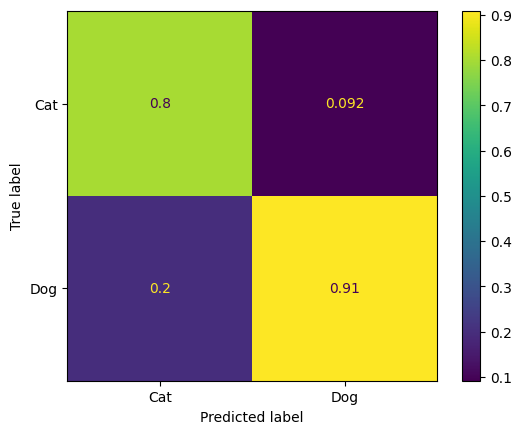

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

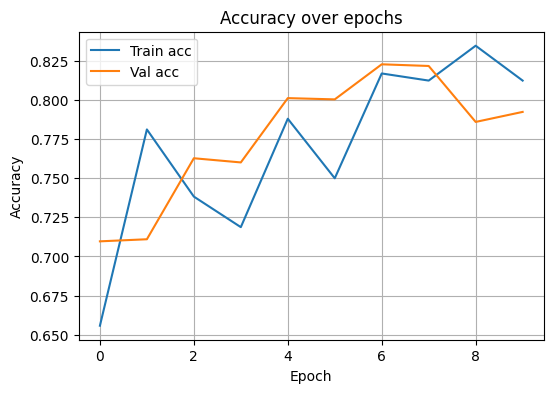

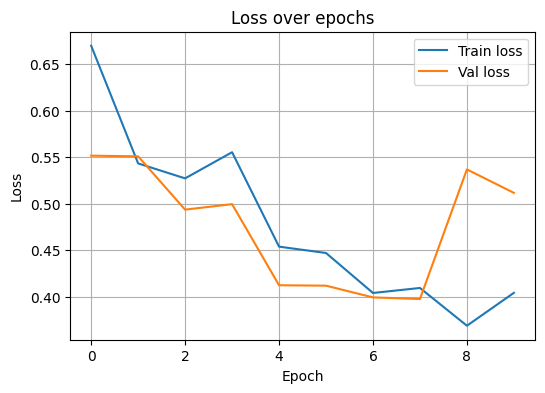

In [51]:
import matplotlib.pyplot as plt

# 1. Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.grid(True)
plt.show()

# 2. Loss plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')
plt.grid(True)
plt.show()


In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Make sure WIDTH, HEIGHT, train_generator, validation_generator, callbacks are already defined

input_shape = (HEIGHT, WIDTH, 3)

# Base model: pretrained on ImageNet, no top layers
base_model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights="imagenet"
)

# Freeze the base for initial training
base_model.trainable = False

inputs = keras.Input(shape=input_shape)

x = inputs
# We already rescale in ImageDataGenerator, so no extra Rescaling here

# Pass through base model
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

tl_model = keras.Model(inputs, outputs)

tl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

tl_model.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [53]:
EPOCHS_TL = 5

history_tl = tl_model.fit(
    train_generator,
    epochs=EPOCHS_TL,
    validation_data=validation_generator,
    callbacks=callbacks,
)

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 112s 200ms/step - accuracy: 0.9192 - loss: 0.2140 - val_accuracy: 0.9597 - val_loss: 0.0936 - learning_rate: 0.0010
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 101s 185ms/step - accuracy: 0.9484 - loss: 0.1240 - val_accuracy: 0.9640 - val_loss: 0.0842 - learning_rate: 0.0010
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 101s 185ms/step - accuracy: 0.9582 - loss: 0.1073 - val_accuracy: 0.9682 - val_loss: 0.0794 - learning_rate: 0.0010
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 181ms/step - accuracy: 0.9543 - loss: 0.1079 - val_accuracy: 0.9674 - val_loss: 0.0803 - learning_rate: 0.0010
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 99s 181ms/step - accuracy: 0.9576 - loss: 0.1070 - val_accuracy: 0.9626 - val_loss: 0.0829 - learning_rate: 0.0010


In [54]:
# Unfreeze some layers
base_model.trainable = True

# Optionally: only fine-tune from some depth
fine_tune_at = 100  # layer index; tweak as desired
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

tl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),  # lower LR!
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

EPOCHS_FT = 5  # again, adjust as needed

history_ft = tl_model.fit(
    train_generator,
    epochs=EPOCHS_TL + EPOCHS_FT,
    initial_epoch=EPOCHS_TL,
    validation_data=validation_generator,
    callbacks=callbacks,
)


Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 135s 234ms/step - accuracy: 0.9260 - loss: 0.1779 - val_accuracy: 0.9669 - val_loss: 0.1022 - learning_rate: 1.0000e-04
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 125s 229ms/step - accuracy: 0.9628 - loss: 0.0965 - val_accuracy: 0.9736 - val_loss: 0.0649 - learning_rate: 1.0000e-04
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 126s 229ms/step - accuracy: 0.9696 - loss: 0.0765 - val_accuracy: 0.9741 - val_loss: 0.0723 - learning_rate: 1.0000e-04
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 125s 229ms/step - accuracy: 0.9762 - loss: 0.0607 - val_accuracy: 0.9749 - val_loss: 0.0798 - learning_rate: 1.0000e-04
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 129s 236ms/step - accuracy: 0.9797 - loss: 0.0550 - val_accuracy: 0.9704 - val_loss: 0.0933 - learning_rate: 1.0000e-04
